# **IRONHACK_Sharks**

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)  
from src.shark_func import *

Proyecto de limpieza del archivo attacks.csv, que se puede localizar en el siguiente link https://www.kaggle.com/datasets/teajay/global-shark-attacks/download?datasetVersionNumber=7

In [2]:
# attacks.csv no está codificado en UTF-8, hay que especificar la codificación en la importación
sharks = pd.read_csv('../data/attacks.csv',encoding='ANSI')    

In [3]:
shape_origin = sharks.shape         # Guardamos el tamaño inicial del dataset
sharks.head(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [4]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Vamos a comprobar si tenemos filas duplicadas

In [5]:
sharks.duplicated().sum()

19411

Tenemos 19411 lineas duplicadas. Procedemos a eliminarlas. No aportan información alguna

In [6]:
sharks.drop_duplicates(inplace = True)
sharks.reset_index(drop=True,inplace=True)

In [7]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [8]:
sharks_info = cols_info(sharks)  # La función de cols_info(). Se puede encontrar en el archivo shark_func, ubicado en la carpeta src
                                 # Da información de los tipos de dato de cada columna    
sharks_info

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,2,6310,2,0,0,0,True,6288,99.62
Date,object,10,6302,10,0,0,0,True,5434,86.09
Year,float64,12,0,6312,0,0,0,False,250,3.96
Type,object,14,6298,14,0,0,0,True,9,0.14
Country,object,60,6252,60,0,0,0,True,213,3.37
Area,object,465,5847,465,0,0,0,True,826,13.09
Location,object,550,5762,550,0,0,0,True,4109,65.1
Activity,object,554,5758,554,0,0,0,True,1533,24.29
Name,object,220,6092,220,0,0,0,True,5231,82.87
Sex,object,575,5737,575,0,0,0,True,7,0.11


### PRIMERAS IMPRESIONES:

Solo quitando líneas duplicadas hemos reducido significativamente el tamaño del dataset. Pasando de 25000 registros a poco más de 6000

Vemos que todas las columnas tienen valores nulos, por lo que el tipo de dato de cada columna no nos aporta gran información de momento porque la presencia de nulos, hace que el tipo de la columna sea float o object (string)

* **Case Number:** identificación única del caso. Parece que están indentificadas con la fecha, y que están en orden decreciente. Vemos que los registros ocurridos en el mismo día, se ordenan con una letra al final para dotar el orden correctaemente
* **Date:** Fecha del registro, parece la misma que la columna 'Case Number'.
* **Year:** Año del suceso. Estas 3 columnas pueden darnos información valiosa a la hora de sustituir nulos, ya que la información de una la podamos aplicar a las otras. Veo que tenemos 250 valores únicos, de primeras esto parece extraño, ya que es bastante imporbable que tengamos registros de 250 años
* **Type:**  Tiene pinta que es tipo de ataque. Tendrá que ser una variable categórica ya que si asignamos un número a un ataque estaremos introduciendo un sesgo en los datos. Solo tiene 9 cateogorías únicas
* **Country:** País del ataque. Tiene 60 valores nulos, el resto string, lo qué es coherente. 213 valores únicos.
* **Area:** Area detro del pais (Estado/provincia/ciudad). Tiene 465 valores nulos, el resto string, lo qué es coherente. 826 valores únicos. De primeras parece una columna bastante complicada de formatear
* **Location:** Localización más precisa. Tiene 550 valores nulos, el resto string, lo qué es coherente. 4109 valores únicos. Columna compleja de formatear. Esta columna puede darnos información para completar información en Area y viceversa
* **Name:** Nombre de la víctima del ataque. Tiene 220 valores nulos, el resto string, lo qué es coherente. 5231 valores únicos. Esta columna seguramente la tengamos que rellenar tanto nulos como ocurrencias que se repiten (p.ej: male) con 'Unknown'. El nombre de la víctima no es relevante a la hora de haber sufrido un ataque
* **Sex:** Sexo de la víctima. Tiene 575 valores nulos, el resto string, lo qué es coherente. 7 valores únicos. Esto tenemos que transformarlo a 3 valores únicos ('Male','Female','Unknow')
* **Age:** Edad de la víctima. Tiene 2841 valores nulos (número miy elevado), el resto string, no es coherente deberían ser int o float. 158 valores únicos, son excesivos. El rango de edad de las victimas no puede ser tan alto, un número lógico sería 70 - 80 valores úncicos. 
* **Injury:** Tipo de lesión del ataque. Desde 'No injury', hasta 'Fatal'. Esta variable sería interesante pasarla a numérica, ya que el grado de lesión puede ser relevante. Hay que examinar la cantidad de grados de lesión que se pueden manejar. 38 valores nulos, el resto string, lo que es coherente. 3738 valores úncicos. Con los valores únicos parece que hay bastante trabajo para poder bajar su número
* **Fatal:** Relacionado con la columna anterior. Hemos visto que la columna injury en algunos registros se especifica 'Fatal', nos puede ayudar a gestionar los nulos de esta columna. 549 valores nulos, el resto string, es coherente. 9 valores únicos, debemos encontrar la forma de pasarlo a 3 'Fatal', 'No fatal', 'Unknown'.
* **Time:** Hora del ataque. 3364 nulos, más de la mitad. 367 valores únicos. Una buena forma de abordar esta columna, sería una clasificación categórica entre mañana / tarde / noche. Manejar valores de hora, puede generar imprecisión.
* **Species:** Columna importante, la lógica nos dice que la especie de tiburón puede tener una correlaición alta si hay una ataque, si este es fatal o no. Gran número de nulos, casi la mitad. Mas de 1500 valores únicos, excesivos también ya que es improbable que haya tantas especies de tiburones. Debemos documentarnos para elegir la clasificacón de esta variable correctamente.
* **Investigator or Source:** Investigador o fuente de donde se han tomado los datos. Pocos valores nulos (27), 4970 valores únicos (demasiados pero coherente)
* **pdf:** Archivo .PDF donde se documenta el caso. Nos fijamos en que muchos de ellos la manera de nombrarlo sigue la siguiente estructura: id del case number + nombre del pdf. Nos puede resultar útil para completar los nulos de case number. Solo 10 nulos, 6392 valores únicos. 
* **href formula:** Tiene pinta que es la dirección web donde se aloja el pdf que documenta el caso. 11 nulos, y prácticamente todos valores únicos
* **href duplicada:** Parece que es la columna anterior duplicada, pero no coinciden los nulos 
* **Case number 1/2:** Caso pareceido al anterior. Parecen duplicadas pero con pequeñas variaciones en valores únicos y nulos. También parace que es copia de Case Number
* **original order:** Solo 3 nulos y el resto float. Parece algún tipo de ordenación ya que el número de valores únicos es casi el 100%
* **Unnamed 22/23:** Columnas que por su nombre hacen indicar que lo más probables es que fueran creadas en la exportación del dataframe a .csv. Tienen entre las dos sólo 3 valores no nulos, todo hace pensar que no aportarán valor al dataset, pero las podremos usar para añadir más información que podamos encontrar útil.

### **1 - Eliminación de nulos**

Nuestro primer objetivo es que no haya ninguna columna con valores nulos. Se observa que todas las columnas tienen nulos. En algunas (Unnamed) prácticamente el 100%. Iremos analizando cada una, e iremos tomando decisiones para ir resolviendo los conflictos

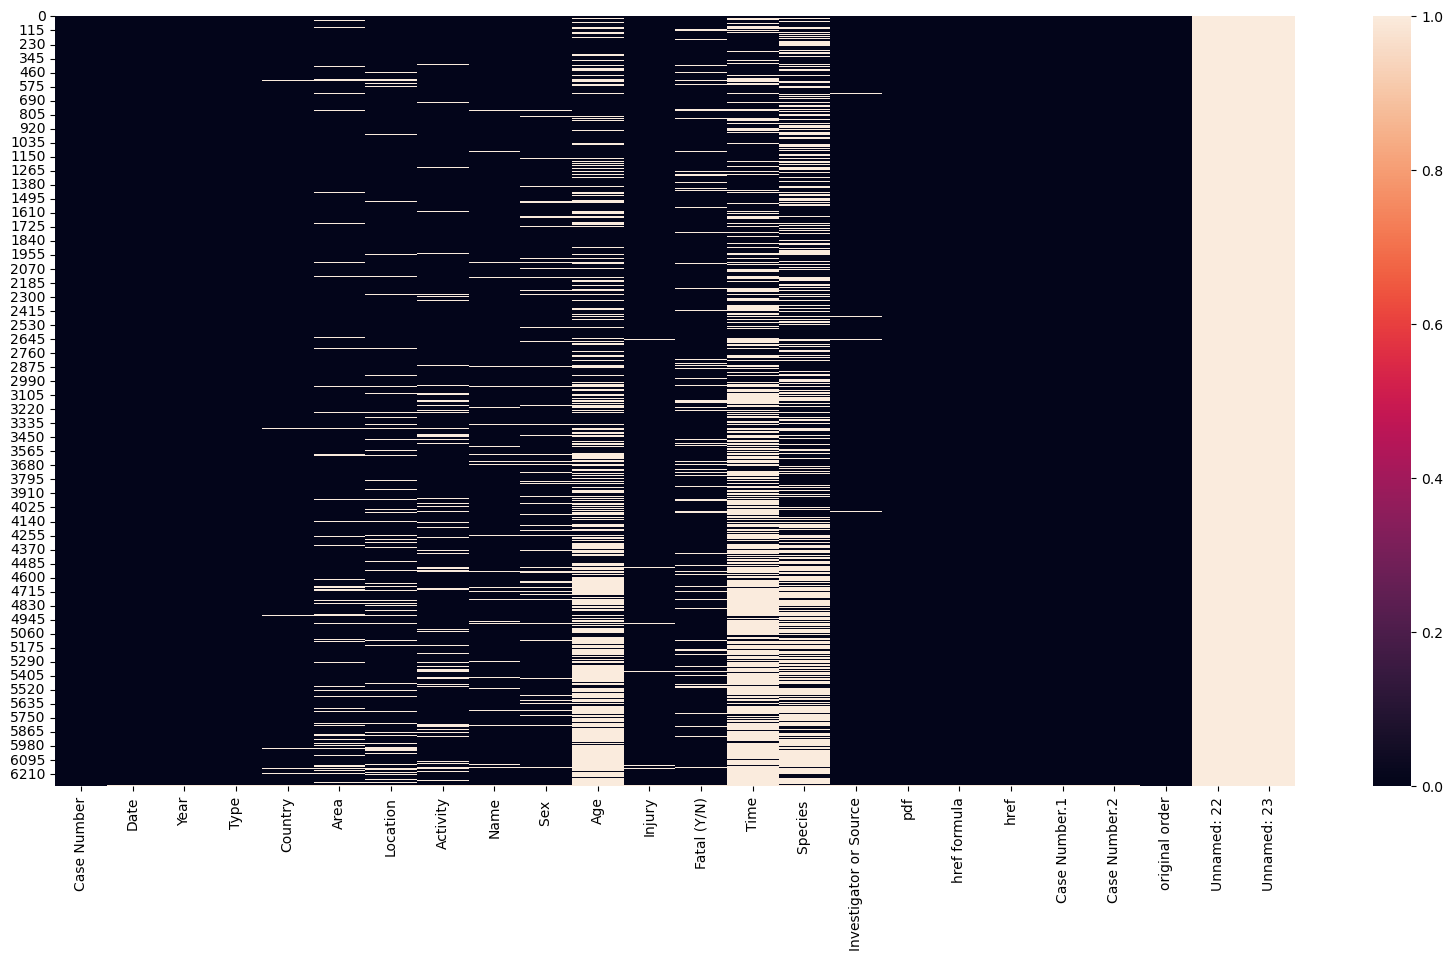

In [9]:
fig, ax = plt.subplots(figsize=(20,10));
sns.heatmap(sharks.isna());

In [10]:
# check_nan_cols() es una función que se encuentra en sharks_func, y nos permite ver de manera rápdia el nº de nulos por columna
check_nan_cols(sharks);

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

En el gráfico anterior se puede intuir que hay un número elevado de registros con un gran número de nulos. Vamos a ver cuantas filas tenemos con un número de nulos mayor o igual que 20

In [11]:
# count_nan_rows() es una función que se encuentra en sharks_func, y nos permite saber los índeces de las filas que contienen un nº de nulos mayor o igual al indicado
nan_index = count_nan_row(sharks,n_nan=20)
sharks.loc[nan_index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se puede ver claramente que estas filas no aportan nada de valor. Procedemos a eliminarlas, y revisamos ahora las filas con un número de nulos mayor que 15

In [12]:
sharks.drop(index=nan_index,inplace=True)
sharks.reset_index(inplace=True,drop=True)

In [13]:
nan_index = count_nan_row(sharks,n_nan=15)
sharks.loc[nan_index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


No hay registros con un número mayor o igual a 15 nulos. Procedemos a evaluar las columnas

#### **1.1 - Columnas Unnamed**

In [14]:
# Hemos visto que solo hay 2 valores no nulos en Unnamed:23 y un valor no nulo en Unnamed:22

sharks[(sharks['Unnamed: 22'].notna()) | sharks['Unnamed: 23'].notna()]   # devuleve las filas en las que tengamos nulos en las columnas Unnamed 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


Los valores no nulos que tenemos son: 'stopped here', 'Terrano' y 'change filename'. Información sin realción alguna con los ataques a tiburones. Vamos a optar añadir a estas dos columnas por 'Unknown'. Más adelante veremos si nos es conveniente usar estas columnas para albergar otra información que consideremos relevante


In [15]:
sharks[['Unnamed: 22', 'Unnamed: 23']] = ['Unknown','Unknown']

In [16]:
# Vuelvo a checkear duplicados en las filas

sharks.duplicated().sum()

0

In [17]:
check_nan_cols(sharks,);

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

Observamos que el número de nulos ha bajado, y que ya tenemos columnas sin valores nulos

#### 1.2 - **Columna original order**

Esta columna ya no tiene nulos pero nos interesa limpiarla para que nos ayude con otras columnas. Ya que parece que nos da información de orden de los registros

In [18]:
sharks['original order'].head(10)

0    6303.0
1    6302.0
2    6301.0
3    6300.0
4    6299.0
5    6298.0
6    6297.0
7    6296.0
8    6295.0
9    6294.0
Name: original order, dtype: float64

In [19]:
sharks['original order'].tail(10)

6292    11.0
6293    10.0
6294     9.0
6295     8.0
6296     7.0
6297     6.0
6298     5.0
6299     4.0
6300     3.0
6301     2.0
Name: original order, dtype: float64

In [20]:
sharks['original order'].value_counts()  # Columna de enteros en la que todos son valores únicos menos 569 que se repite 1 vez

original order
569.0     2
6303.0    1
2106.0    1
2097.0    1
2098.0    1
         ..
4205.0    1
4206.0    1
4207.0    1
4208.0    1
2.0       1
Name: count, Length: 6301, dtype: int64

In [21]:
sharks[sharks['original order']==569]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5733,1888.01.22,22-Jan-1888,1888.0,Boating,AUSTRALIA,New South Wales,Sydney Harbor,Rowing,Burke,M,NaN,"Shark bit boat, but no injury to occupant who ...",N,NaN,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.01.22,1888.01.22,569.0,Unknown,Unknown
5734,1888.02.00,Feb-1888,1888.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,male,M,NaN,FATAL,Y,NaN,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.02.00,1888.02.00,569.0,Unknown,Unknown


In [22]:
sharks['original order'].max() - sharks['original order'].min() 

6301.0

Esta columna representa el numero de ordenación original del dataset. Hemos llegado a la siguiente concluisión con estos datos:
* Vemos que registros consecutivos tienen numeros consecutivos en esta columna
* La diferencia entre el maximo y el minomo es de 6308, si le sumamos el valor repetido y los tres valores nulos suman 6312. La longitud de nuestro dataset
* SE LLAMA ORIGINAL ORDER!!!!!!

Como esta columna es unicamente para referenciar registros, vamos a ordenarla de 1 a 6302 que es el número total de registros que tenemos ahora mismo.

Vamos a comprbar que estón en orden decreciente y monótono, ya que lo que hemos visto en las tablas es lo que parece indicar

In [23]:
# Para comprobarlo tenemos que eliminar momentaneamente el indice repetido
index_569 = sharks[sharks['original order']==569].index
sharks.drop(index=index_569[0])['original order'].is_monotonic_decreasing

True

Debo intercambiar el orden de las filas para que el orden sea correcto. Ya que el registro más reciente tiene que tener un menor índice

In [24]:
row_copy = sharks.loc[index_569[0],:]
sharks.loc[index_569[0],:] = sharks.loc[index_569[1],:]
sharks.loc[index_569[1],:] = row_copy
sharks[sharks['original order']==569]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5733,1888.02.00,Feb-1888,1888.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,male,M,NaN,FATAL,Y,NaN,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.02.00,1888.02.00,569.0,Unknown,Unknown
5734,1888.01.22,22-Jan-1888,1888.0,Boating,AUSTRALIA,New South Wales,Sydney Harbor,Rowing,Burke,M,NaN,"Shark bit boat, but no injury to occupant who ...",N,NaN,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1888.01.22,1888.01.22,569.0,Unknown,Unknown


In [25]:
sharks['original order'] = range(0,sharks.shape[0])

In [26]:
sharks['original order'] = sharks['original order'].astype(np.int16)

In [27]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,float64,2,0,6302,0,0,0,False,250,3.97
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


#### 1.3 - **Columnas Case Number  y Year**

In [28]:
check_nan_cols(sharks);

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

In [29]:
sharks[sharks.Year.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,187,Unknown,Unknown
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,6079,Unknown,Unknown


In [30]:
# Puedo sacar el año con el case number
sharks.loc[sharks.Year.isna(),['Year']] = sharks.loc[sharks.Year.isna(),:]['Case Number'].apply(lambda x:x[0:4])
sharks.loc[[187,6079]]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,2017,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,187,Unknown,Unknown
6079,1836.08.19.R,Reported 19-Aug-1836,1836,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,6079,Unknown,Unknown


In [31]:
# Tengo que transformar Date a int, ya que todos son valores enteros
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,object,0,2,6300,0,0,0,False,251,3.98
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


In [32]:
sharks.loc[:,'Year'] = sharks.Year.apply(int)
sharks['Year'] = sharks['Year'].astype(np.int16)

Tenemos 249 valores únicos. Parece un poco elevado, pero lo evaluaremos más tarde. Nos seguiremos centrando en los nulos

In [33]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,1,6301,1,0,0,0,True,6286,99.75
Date,object,0,6302,0,0,0,0,True,5433,86.21
Year,int16,0,0,0,6302,0,0,True,249,3.95
Type,object,4,6298,4,0,0,0,True,9,0.14
Country,object,50,6252,50,0,0,0,True,213,3.38
Area,object,455,5847,455,0,0,0,True,826,13.11
Location,object,540,5762,540,0,0,0,True,4109,65.2
Activity,object,544,5758,544,0,0,0,True,1533,24.33
Name,object,210,6092,210,0,0,0,True,5231,83.01
Sex,object,565,5737,565,0,0,0,True,7,0.11


In [34]:
sharks['Case Number']

0       2018.06.25
1       2018.06.18
2       2018.06.09
3       2018.06.08
4       2018.06.04
           ...    
6297       ND.0005
6298       ND.0004
6299       ND.0003
6300       ND.0002
6301       ND.0001
Name: Case Number, Length: 6302, dtype: object

In [35]:
sharks[sharks['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5488,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,5488,Unknown,Unknown


In [36]:
# Compeletamos el nulo con la información de la fecha que nos da la columna Date
sharks['Case Number'].fillna('1905.09.06',inplace=True)

In [37]:
sharks[sharks['Case Number'].duplicated()].size

384

La columna de Case Number, debería contener valores únicos al 100% ya que es algo que indentifica el registro unitariamente. Vemos que la codificación no es fija. Para la identificación unitaria del caso ya tenemos la columna original order que ya hemos visto antes. Por lo que en esta columna no la trabajaremos más, ya que no aporta más valor que el de ayudarnos a rellenar nulos en otras columnas

#### 1.4 - **Columna Type**

In [38]:
sharks[sharks.Type.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
85,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,85,Unknown,Unknown
382,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,382,Unknown,Unknown
4867,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,4867,Unknown,Unknown
5705,1890.03.03.R,Reported 03-Mar-1890,1890,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,5705,Unknown,Unknown


In [39]:
sharks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

Con esta columna procederemos de la siguiente manera:
* Los nulos los catalogaremos como 'Unknown'. No son muchos y la información del resto de columnas parece válida en un principio
* Evaluaremos el nº de ataques etiquetados como 'questionable'. Si no son elevados los eliminaremos ya que no queremos trabajar con datos cuya veracidad no está probada
* Boat, Boating, Boatmg los unificaremos en una única etiqueta denomindada Boat

In [40]:
sharks.Type.fillna('Unknown',inplace=True)
sharks.loc[sharks.Type.isin(['Boating','Boatomg']),'Type'] = 'Boat'

In [41]:
sharks[sharks.Type=='Questionable'] # Son solo dos registros. los borramos

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
16,2018.05.09,09-May-2018,2018,Questionable,AUSTRALIA,New South Wales,"Sharpes Beach, Ballina",Surfing,male,M,NaN,"No injury, surfboard damaged",N,10h30,Shark involvement not confirmed,"B. Myatt, GSAF",2018.05.09-SharpesBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.09,2018.05.09,16,Unknown,Unknown
20,2018.04.25.b,25-Apr-2018,2018,Questionable,AUSTRALIA,New South Wales,Lennox Head,Surfing,Matthew Lee,M,NaN,No injury,N,07h00,Questionable,"B. Myatt, GSAF",2018.04.25.b-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.25.b,2018.04.25.b,20,Unknown,Unknown


In [42]:
index_type = sharks[sharks.Type=='Questionable'].index
sharks.drop(index=index_type,inplace=True)
sharks.reset_index(inplace=True,drop=True)

In [43]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6300,0,0,0,0,True,6284,99.75
Date,object,0,6300,0,0,0,0,True,5432,86.22
Year,int16,0,0,0,6300,0,0,True,249,3.95
Type,object,0,6300,0,0,0,0,True,6,0.1
Country,object,50,6250,50,0,0,0,True,213,3.38
Area,object,455,5845,455,0,0,0,True,826,13.11
Location,object,540,5760,540,0,0,0,True,4109,65.22
Activity,object,544,5756,544,0,0,0,True,1533,24.33
Name,object,210,6090,210,0,0,0,True,5230,83.02
Sex,object,565,5735,565,0,0,0,True,7,0.11


#### 1.5 - **Columnas Investigator source y href formula**

In [44]:
sharks[sharks['Investigator or Source'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
117,2017.07.14.a,14-Jul-2017,2017,Unprovoked,AUSTRALIA,Western Australia,Floreat Beach,Surfing,male,M,NaN,"Minor injury, grazed by shark",N,11h45,NaN,NaN,2017.07.14.a-Floreat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.14.a,2017.07.14.a,119,Unknown,Unknown
288,2016.04.07.b,07-Apr-2016,2016,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing,Jonathan Lester,M,34,Left hand bitten,N,NaN,5' to 6' shark,NaN,2016.04.07.b-Lester.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.07.b,2016.04.07.b,290,Unknown,Unknown
380,2015.07.27,27-Jul-2015,2015,Unknown,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,382,Unknown,Unknown
629,2013.08.31.b,31-Aug-2013,2013,Unprovoked,BAHAMAS,NaN,Freetown Beach,Spearfishing,Bryan Collins,M,NaN,Lower left leg bitten,N,NaN,Blacktip shark,NaN,2013.08.31.b-Collins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.08.31.b,2013.08.31.b,631,Unknown,Unknown
1128,2009.04.28,28-Apr-2009,2009,Unprovoked,USA,Florida,"St. Augustine, St. John's County",NaN,Alicia,F,NaN,Multiple lacerations to right foot & ankle,N,16h45,NaN,NaN,2009.04.28-Alicia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.04.28,2009.04.28,1130,Unknown,Unknown
1240,2008.06.28.a,28-Jun-2008,2008,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Surf skiing,Kobus Maritz,M,46,"No injury, ski bitten",N,14h00,"White shark, 2m",NaN,2008.06.28.a-Maritz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.06.28.a,2008.06.28.a,1242,Unknown,Unknown
2123,1999.04.22,22-Apr-1999,1999,Unprovoked,MAURITIUS,Grand Baie,Pointe aux Canonniers,Swimming,Sylvia Lanner,F,41,Thigh bitten,N,06h00,"Grey reef shark, 1.5 m",NaN,1999.04.22-Lanner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.04.22,1999.04.22,2125,Unknown,Unknown
2142,1999.00.00.a,1999,1999,Invalid,USA,Virginia,"Sandridge Beach, Virginia Beach, Princess Anne...",Body surfing,male,M,NaN,Abrasions,NaN,NaN,Shark involvement not confirmed,NaN,1999.00.00.a-NV-SandridgeBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.00.00.a,1999.00.00.a,2144,Unknown,Unknown
2458,1994.00.00.a,1994,1994,Unprovoked,USA,Florida,"Flagler Beach, Flagler County",Surfing,Jeff Weakley,M,NaN,Foot bitten,N,NaN,NaN,NaN,1994.00.00.a--JeffWeakley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.00.00.a,1994.00.00.a,2460,Unknown,Unknown
2646,1990.00.00,1990,1990,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,17,NaN,UNKNOWN,NaN,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,2648,Unknown,Unknown


No nos vamos a complicar. La fuente de los datos nos sirve para dar veracidad o no al registro, no es nuestro objetivo. Además tenemos otras columnas que nos pueden dar esta información. No vamos a perder mucho el tiempo aquí. Todo lo que sea nulo lo catalogaremos como 'Unknown'

In [45]:
sharks['Investigator or Source'].fillna('Unknown',inplace=True)

In [46]:
sharks[sharks['href formula'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3242,1975.01.19,19-Jan-1975,1975,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,17,"FATAL, body not recovered",Y,NaN,NaN,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3244,Unknown,Unknown


Misma situación, esto no aporta valor a los datos. Igualamos información con href

In [47]:
sharks.loc[sharks['href formula'].isna(),'href formula'] = sharks.loc[sharks['href formula'].isna(),'href']

In [48]:
check_nan_cols(sharks);

Country          50
Area            455
Location        540
Activity        544
Name            210
Sex             565
Age            2829
Injury           28
Fatal (Y/N)     539
Time           3354
Species        2838
dtype: int64

#### 1.6 - **Columnas Country / Area / Location**

In [49]:
sharks[sharks.Country.isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
60,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,62,Unknown,Unknown
523,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,525,Unknown,Unknown
2954,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,2956,Unknown,Unknown
3376,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,3378,Unknown,Unknown
3385,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,3387,Unknown,Unknown
3386,1970.07.05,5-Jul-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,3388,Unknown,Unknown
3393,1970.04.00.b,Apr-1970,1970,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,3395,Unknown,Unknown
3397,1970.02.05,5-Feb-1970,1970,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,3399,Unknown,Unknown
3423,1969.08.00,Aug-1969,1969,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,25,Am lacerated,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,3425,Unknown,Unknown
3603,1965.10.21,21-Oct-1965,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,3605,Unknown,Unknown


Vamos a ver si sacamos información de otras columnas

In [50]:
sharks[sharks.Country.isna() & ((sharks.Area.notna())|(sharks.Location.notna()))]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2954,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,2956,Unknown,Unknown
3385,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,3387,Unknown,Unknown
3603,1965.10.21,21-Oct-1965,1965,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,39,Survived,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,3605,Unknown,Unknown
4016,1960.01.26,26-Jan-1960,1960,Sea Disaster,NaN,"Between Timor & Darwin, Australia",NaN,Portuguese Airliner with 9 people aboard went ...,NaN,NaN,NaN,"As searchers approached wreckage, sharks circl...",N,NaN,NaN,"V.M. Coppleson (1962), p.260",1960.01.26-Portuguese airliner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1960.01.26,1960.01.26,4018,Unknown,Unknown
4229,1956.09.13,13-Sep-1956,1956,Unprovoked,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,male,M,NaN,FATAL,Y,P.M.,Blue shark,M. Hosina,1956.09.13-TunaBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.13,1956.09.13,4231,Unknown,Unknown
4264,1956.00.00.g,1956,1956,Sea Disaster,NaN,Between Comores & Madagascar,Geyser Bank,Shipwreck,"Captain Eric Hunt, the cook & a French passenger",M,NaN,FATAL,Y,NaN,NaN,dinofish.com,1956.00.00.g-Capt-Hunt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.00.00.g,1956.00.00.g,4266,Unknown,Unknown
4496,1949.12.00.b,Dec-1949,1949,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",M,NaN,Fatal or drowning or scavenging,Y,NaN,Shark involvement not confirmed,"Canberra Times, 1/6/1950",1949.12.00.b-Wingate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.12.00.b,1949.12.00.b,4498,Unknown,Unknown
4637,1944.10.24,24-Oct-1944,1944,Sea Disaster,NaN,NaN,225 miles east of Hong Kong,Japanese POW ship Arisan Maru with 1800 Americ...,NaN,M,NaN,Most of the men drowned & some were taken by s...,Y,>17h30,NaN,internet (multiple),1944.10.24-ArisanMaru.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.10.24,1944.10.24,4639,Unknown,Unknown
4698,1942.11.00.a,Nov-1942,1942,Sea Disaster,NaN,Off South American coast,NaN,Dutch merchant ship Zaandam torpedoed by the ...,NaN,M,NaN,FATAL,Y,NaN,NaN,"M. Murphy; V.M. Coppleson (1962), pp.207-208",1942.11.00.a-Izzi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1942.11.00.a,1942.11.00.a,4700,Unknown,Unknown
4710,1942.06.00,Jun-1942,1942,Unprovoked,NaN,300 miles east of St. Thomas (Virgin Islands),NaN,On life raft tethered to lifeboat. A seaman pu...,male,M,NaN,Forearm lacerated,N,NaN,NaN,"V.M. Coppleson (1962), p.258",1942.06.00-on-life-raft.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreads

Para sacar una información fiable tendríamos que evaluar una por uno los registros. La ubicación del ataque es una variable a tener en cuenta, ya que puede influir en una probabilidad de que este suceda. Teniendo en cuenta estom, procederemos de la siguiente manera:



* Evaluaremos que registros tienen estos 3 campos nulos, si no son muchos los eliminaremsos ya que no nos darán información,
* El resto de nulos que nos queden lo dejaremos como 'Unknown', ya que si necesitamos tendremos al menos la inforamción de alguno de los otros campos. Y en caso de ser necesario, se podría completar la información.

In [51]:
sharks[sharks.Country.isna() & (sharks.Area.isna()) & (sharks.Location.isna())].size 
# No podemos deshacernos de estos registros, tendríamos menos de 6000 registros, que es el mínimo marcado

696

In [59]:
# Rellenamos todo con 'Unknown'
sharks['Country'].fillna('Unknown',inplace=True)
sharks['Location'].fillna('Unknown',inplace=True)
sharks['Area'].fillna('Unknown',inplace=True)

In [62]:
sharks.Country.unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'Unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

No nos pararemos ahora a analizar todos los paises. Hay datos inconsistentes, hay registros de islas, oceanos o mares. Más adelante le meteremos mano a esto

In [60]:
cols_info(sharks)

,Col Type,Nulos,str,float,int,bool,date,float==nan,unique,unique %
Case Number,object,0,6300,0,0,0,0,True,6284,99.75
Date,object,0,6300,0,0,0,0,True,5432,86.22
Year,int16,0,0,0,6300,0,0,True,249,3.95
Type,object,0,6300,0,0,0,0,True,6,0.1
Country,object,0,6300,0,0,0,0,True,213,3.38
Area,object,0,6300,0,0,0,0,True,826,13.11
Location,object,0,6300,0,0,0,0,True,4109,65.22
Activity,object,544,5756,544,0,0,0,True,1533,24.33
Name,object,210,6090,210,0,0,0,True,5230,83.02
Sex,object,565,5735,565,0,0,0,True,7,0.11


#### 1.7 - **Columnas Injury / Fatal**

In [64]:
sharks[['Injury','Fatal (Y/N)']][sharks.Injury.isna()]

,Injury,Fatal (Y/N)
1268,NaN,UNKNOWN
1364,NaN,NaN
2248,NaN,UNKNOWN
2265,NaN,UNKNOWN
2646,NaN,UNKNOWN
3036,NaN,UNKNOWN
3205,NaN,NaN
3296,NaN,UNKNOWN
3432,NaN,UNKNOWN
3455,NaN,NaN


En la columna Injury, no podemos sacar información de la columna Fatal, salvo por un registro. Procederemos de la siguiente manera: